In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import csv
from IPython.display import display 
from fuzzywuzzy import fuzz, process
import datetime
from dateutil.relativedelta import relativedelta     
%matplotlib inline

In [2]:
#Load CSV and remove redundant columns 
df = pd.read_csv('Movies - Cleaned.csv', index_col=False)
df = df.drop(['Description', 'index', 'URL', 'Year', 'Runtime (mins)'], axis = 1)
df.describe()

,IMDb Rating,Num Votes,Order
count,847.000000,8.470000e+02,866.00000
mean,6.375089,2.126588e+05,2.15358
std,1.130652,2.543826e+05,1.63932
min,2.000000,8.240000e+02,1.00000
25%,5.700000,4.870850e+04,1.00000
50%,6.500000,1.209190e+05,2.00000
75%,7.200000,2.710940e+05,3.00000
max,9.200000,2.220190e+06,14.00000


In [3]:
#Clearn all data to avoid Nonetype object
df = df.dropna()
null_counts = df.isnull().sum()
infinite_counts = df.isin([np.inf, -np.inf]).sum()

In [4]:
df.describe()

,IMDb Rating,Num Votes,Order
count,847.000000,8.470000e+02,847.000000
mean,6.375089,2.126588e+05,2.153483
std,1.130652,2.543826e+05,1.628661
min,2.000000,8.240000e+02,1.000000
25%,5.700000,4.870850e+04,1.000000
50%,6.500000,1.209190e+05,2.000000
75%,7.200000,2.710940e+05,3.000000
max,9.200000,2.220190e+06,14.000000


In [5]:
df['IMDb Rating diff'] = df.groupby('Movie Series')['IMDb Rating'].apply(lambda x: x - x.iloc[0])
df

,Title,Release Date,IMDb Rating,Genres,Num Votes,Directors,Movie Series,Order,IMDb Rating diff
0,101 Dalmatians,18-11-1996,5.7,"Adventure, Comedy, Crime, Family",98439.0,Stephen Herek,101 Dalmatians,1,0.0
1,102 Dalmatians,22-11-2000,4.9,"Adventure, Comedy, Family",33823.0,Kevin Lima,101 Dalmatians,2,-0.8
2,12 Rounds,19-03-2009,5.6,"Action, Crime, Thriller",26828.0,Renny Harlin,12 Rounds,1,0.0
3,12 Rounds 2: Reloaded,04-06-2013,5.3,"Action, Adventure, Thriller",5141.0,Roel Reiné,12 Rounds,2,-0.3
4,21 Jump Street,12-03-2012,7.2,"Action, Comedy, Crime",498876.0,"Christopher Miller, Phil Lord",21 Jump Street,1,0.0
...,...,...,...,...,...,...,...,...,...
861,[Rec]²,02-09-2009,6.5,"Action, Adventure, Fantasy, Horror, Sci-Fi, Th...",67100.0,"Jaume Balagueró, Paco Plaza",[Rec],2,-0.9
862,[Rec]³: Génesis,09-03-2012,5.0,"Action, Comedy, Horror, Romance, Sci-Fi, Thriller",32388.0,Paco Plaza,[Rec],3,-2.4
863,[REC] 4: Apocalipsis,09-09-2014,5.3,"Action, Adventure, Fantasy, Horror, Sci-Fi, Th...",15599.0,Jaume Balagueró,[Rec],4,-2.1
864,xXx,09-08-2002,5.9,"Action, Adventure, Thriller",170874.0,Rob Cohen,xXx,1,0.0


In [6]:
better = df[(df['Order'] > 1) & (df['IMDb Rating diff'] > 0)].shape[0]

total = df[df['Order'] > 1].shape[0]
prob = better / total
print(f"The probability of a sequel being better than its original is {prob:.2f}")

The probability of a sequel being better than its original is 0.13


In [7]:
original_df = df.loc[df['Order'] == 1]
original_df.describe()

,IMDb Rating,Num Votes,Order,IMDb Rating diff
count,363.000000,3.630000e+02,363.0,363.0
mean,6.716253,2.452486e+05,1.0,0.0
std,0.974444,2.658228e+05,0.0,0.0
min,2.400000,2.554000e+03,1.0,0.0
25%,6.200000,7.217900e+04,1.0,0.0
50%,6.800000,1.575600e+05,1.0,0.0
75%,7.400000,3.319075e+05,1.0,0.0
max,9.200000,1.615984e+06,1.0,0.0


In [8]:
df = df[df['Order'] > 1]
df['IMDb Rating diff'].describe()

count    484.000000
mean      -0.841322
std        0.948327
min       -4.700000
25%       -1.300000
50%       -0.700000
75%       -0.200000
max        1.500000
Name: IMDb Rating diff, dtype: float64

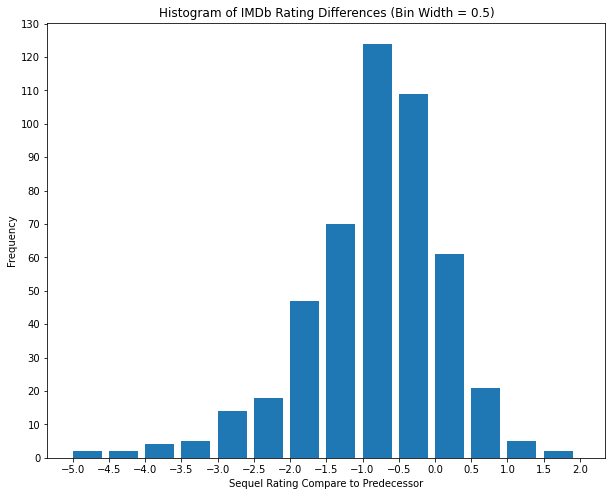

In [9]:
import matplotlib.pyplot as plt


imdb_diff = df['IMDb Rating diff']
fig, ax = plt.subplots(figsize=(10, 8))
bins = np.arange(-5, 2.5, 0.5)

ax.hist(imdb_diff, bins=bins, width=0.4)

ax.set_xlabel('Sequel Rating Compare to Predecessor')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of IMDb Rating Differences (Bin Width = 0.5)')
ax.set_yticks(range(0, 140, 10))
xticks = np.arange(-5, 2.5, 0.5)
ax.set_xticks(xticks)
plt.show()

In [24]:
genre_list = set(df['Genres'])
unique_genres = []
for genre in genre_list:
    unique_genres.extend([g.strip() for g in genre.split(',')])
unique_genres = set(genres)
print(genres)

{'Western', 'War', 'Action', 'Sci-Fi', 'History', 'Romance', 'Biography', 'Mystery', 'Drama', 'Music', 'Fantasy', 'Animation', 'Sport', 'Comedy', 'Horror', 'Crime', 'Adventure', 'Thriller', 'Musical', 'Family'}


In [34]:
movies_filtered = [movie for movie in df if (genre in movie['Genres'] for genre in unique_genres)]

In [50]:
genre_df = df[['Genres', 'IMDb Rating diff']]
genre_df.head


<bound method NDFrame.head of                                                 Genres  IMDb Rating diff
1                            Adventure, Comedy, Family              -0.8
3                          Action, Adventure, Thriller              -0.3
5                                Action, Comedy, Crime              -0.2
7                                       Horror, Sci-Fi              -0.6
10     Action, Comedy, Crime, Drama, Mystery, Thriller              -1.0
..                                                 ...               ...
859        Action, Adventure, Comedy, Mystery, Romance              -1.8
861  Action, Adventure, Fantasy, Horror, Sci-Fi, Th...              -0.9
862  Action, Comedy, Horror, Romance, Sci-Fi, Thriller              -2.4
863  Action, Adventure, Fantasy, Horror, Sci-Fi, Th...              -2.1
865         Action, Adventure, Crime, Sci-Fi, Thriller              -1.5

[484 rows x 2 columns]>

In [105]:
genre_dict = {}

for index, row in df.iterrows():
    # split the genres into a list
    genres = row['Genres'].split(',')

    # loop through each genre in the list
    for genre in genres:
        # strip whitespace from the genre
        genre = genre.strip()

        # check if the genre already exists in the genre dictionary
        if genre in genre_dict:
            # if it exists, append the IMDb Rating diff to the existing list
            genre_dict[genre].append(row['IMDb Rating diff'])
        else:
            # if it doesn't exist, create a new list with the IMDb Rating diff
            genre_dict[genre] = [row['IMDb Rating diff']]


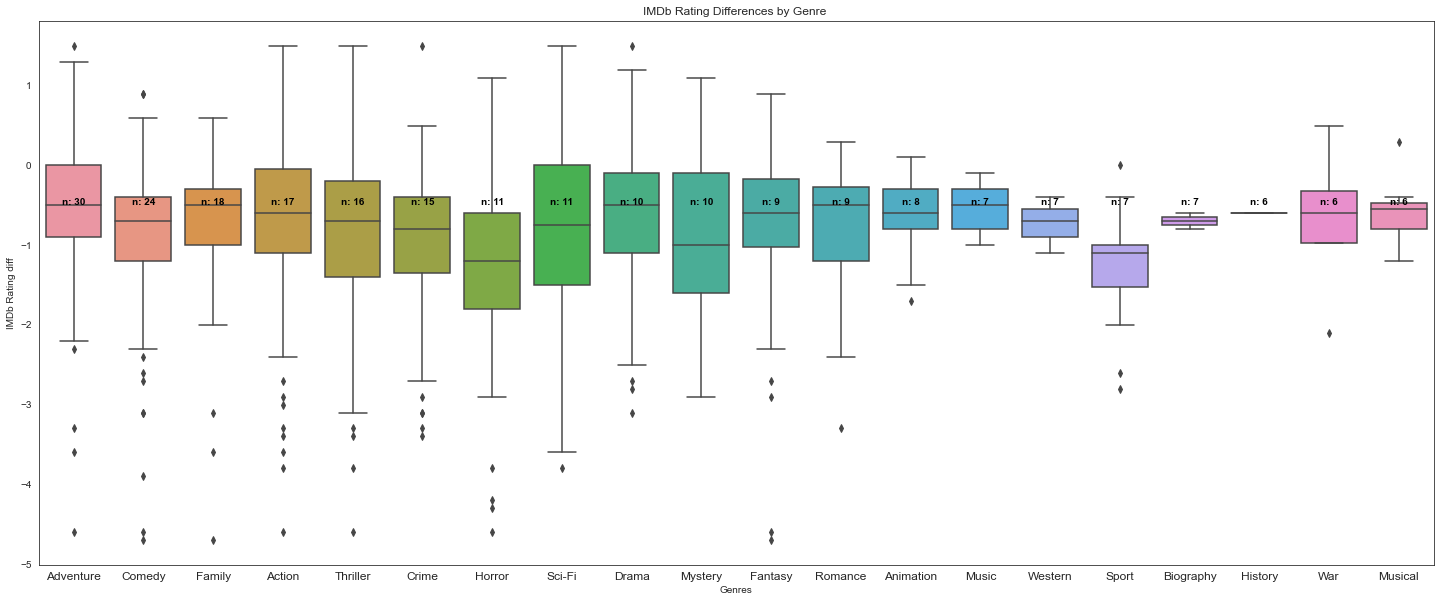

In [106]:
genre_data = list(genre_dict.values())

# create box plots for each genre
fig, ax = plt.subplots(figsize=(25,10))
sns.boxplot(data=genre_data, ax=ax)
ax.set_xticklabels(genre_dict.keys())
ax.set_ylabel('IMDb Rating diff')

ax.set_xlabel('Genres')
ax.set_xticklabels(genre_dict.keys(), fontsize=12) # set font size for x-axis tick labels
ax.set_title('IMDb Rating Differences by Genre ')

xpos = 0.7 # set the x-position of the line
for line in ax.lines:
    if line.get_label() == 'Median':
        y = line.get_ydata()[0] # set the y-position of the line to the median value
        ax.plot([xpos-0.1, xpos+0.1], [y, y], color='black', lw=2)

nobs = df['Genres'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

pos = range(len(nobs))
for tick, label in zip(pos, plt.gca().get_xticklabels()):
    plt.text(pos[tick], -0.5, nobs[tick],
             horizontalalignment='center', size='medium', color='black', weight='semibold')
    
counts = df['Genres'].value_counts()
counts_df = pd.DataFrame({'Genres': counts.index, 'count': counts.values})

# order the genres by count
order = counts_df.sort_values('count')['Genres'].values


plt.show()
    
    
  

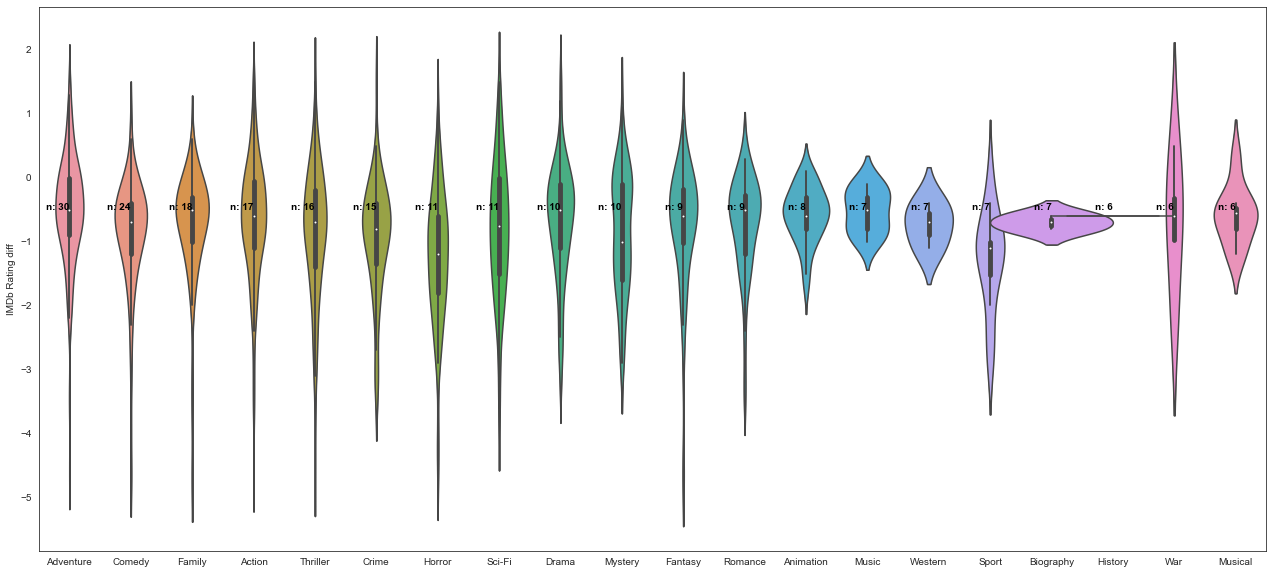

In [116]:
fig, ax = plt.subplots(figsize=(22,10))
sns.violinplot(data=list(genre_dict.values()), ax=ax, width=1.5)
sns.violinplot(data=list(genre_dict.values()), ax=ax, width=2, inner='box')

ax.set_xticklabels(genre_dict.keys())
ax.set_ylabel('IMDb Rating diff')

pos = range(len(nobs))
for tick, label in zip(pos, plt.gca().get_xticklabels()):
    plt.text(pos[tick], -0.5, nobs[tick],
             horizontalalignment='right', size='medium', color='black', weight='semibold')
    
counts = df['Genres'].value_counts()
counts_df = pd.DataFrame({'Genres': counts.index, 'count': counts.values})
plt.show()

/Users/wallace/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


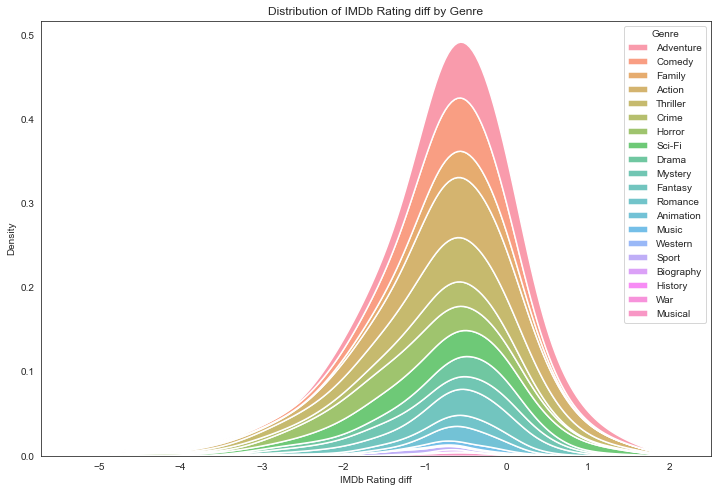

In [110]:
genre_dfs = []
for genre, values in genre_dict.items():
    genre_df = pd.DataFrame({genre: values})
    genre_dfs.append(genre_df)

# combine dataframes and melt to long format
genre_data = pd.concat(genre_dfs, axis=1)
genre_data = genre_data.melt(var_name='Genre', value_name='IMDb Rating diff')

# create ridgeline plot
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style('white')
sns.kdeplot(data=genre_data, x='IMDb Rating diff', hue='Genre', fill=True, alpha=.7, linewidth=1.5, multiple='stack')
plt.xlabel('IMDb Rating diff')
plt.title('Distribution of IMDb Rating diff by Genre')


plt.show()

In [11]:
import os  
os.makedirs('folder/subfolder', exist_ok=True)  
df.to_csv('folder/subfolder/Films_probability.csv')  